# Predicting heart disease using machine learning

This notebook consists of building a machine learning model capable of predicting wheter or not someone has heart disease based on their medical attributes.

I am going to take the following approach :
1. Problem definition
2. Data 
3. Evaluation 
4. Features
5. Data Exploration
6. Modelling
7. Experimentation

## 1. Problem definition

The problem we will be exploring is <strong>binary classification</strong> because we are going to predict if a patient has a heart disease or not.

In a statement,
>Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The data came from here https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction?resource=download


## 3. Evaluation

> If we can reach if possible 95% accuracy at predicting wheter or not a patient has heart disease 

## 4. Features

1. Age - age in years
2. Sex - (1 = male; 0 = female)
3. Chest pain type
    * 1: Typical angina: chest pain related decrease blood supply to the heart
    * 2: Atypical angina: chest pain not related to heart
    * 3: Non-anginal pain: typically esophageal spasms (non heart related)
    * 4: Asymptomatic: chest pain not showing signs of disease
4. BP - resting blood pressure (in mm Hg on admission to the hospital)
    anything above 130-140 is typically cause for concern
5. Cholesterol - serum cholestoral in mg/dl
    serum = LDL + HDL + .2 * triglycerides
    above 200 is cause for concern
6. FBS over 120 - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    '>126' mg/dL signals diabetes,
7. EKG results - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy Enlarged heart's main pumping chamber
8. Max HR - maximum heart rate achieved
9. Exercise angina - exercise induced angina (1 = yes; 0 = no)
10. ST depression - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. Slope of ST - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. Number of vessels fluro - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. Thallium - thalium stress result 
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. Heart Disease - have disease or not ("Presence"=yes, "Absente"=no) (= the predicted attribute)

In [3]:
#tools
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

%matplotlib inline

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

## 5. Data Exploration

In [14]:
df = pd.read_csv("heart-disease.csv")
df.shape

(270, 14)

In [15]:
# checking the top 5 rows of our dataframe
df.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [6]:
#seeing how many positive and negative samples we have in our dataframe
df["Heart Disease"].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

These two values are close to even, so our target "Heart Disease" column can be considered <strong>balanced</strong>

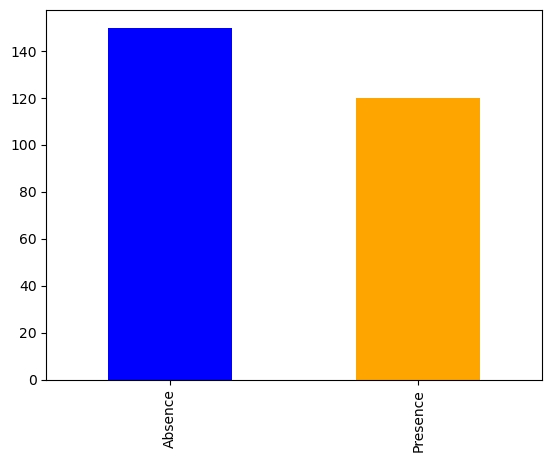

In [7]:
# Plot the value counts with a bar graph
df["Heart Disease"].value_counts().plot(kind="bar", color=["blue", "orange"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [9]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [16]:
# Applying the condition
cond1 = df["Heart Disease"] == 'Absence'
df.loc[cond1, "Heart Disease"] = 0

cond2 = df["Heart Disease"] == 'Presence'
df.loc[cond2, "Heart Disease"] = 1

In [17]:
df["Heart Disease"] = df["Heart Disease"].astype('int64')
df["Heart Disease"].dtypes

dtype('int64')

#### Heart Disease Frequency according to Gender

In [18]:
# Compare target column with sex column
pd.crosstab(df['Heart Disease'], df["Sex"])

Sex,0,1
Heart Disease,,
0,67,83
1,20,100


Since there are about 87 women and 20 of them have a postive value of heart disease being present, we might infer, based on this one variable if the participant is a woman, there's a 25% chance she has heart disease.

As for males, there's about 183 total and 100 of them  indicating a presence of heart disease. So we might predict, if the participant is male, 85% of the time he will have heart disease.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 55% chance they have heart disease.

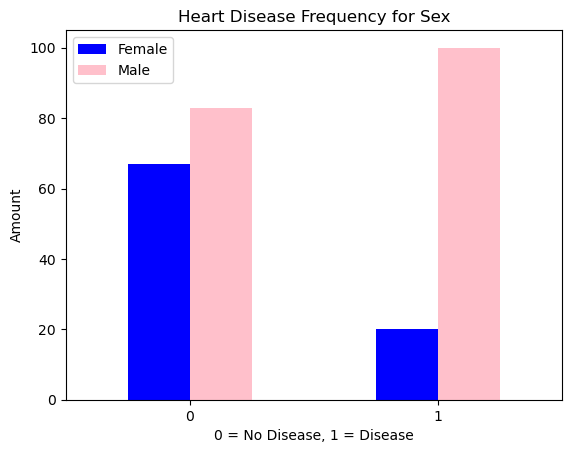

In [21]:
#let's visualize this
# Create a plot
pd.crosstab(df['Heart Disease'], df["Sex"]).plot(kind="bar", color=["blue", "pink"])

# Add some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

#### Age vs Max Heart rate for Heart Disease

Let's try combining a couple of independent variables, such as, age and Max HR (maximum heart rate) and then comparing them to our target variable heart disease

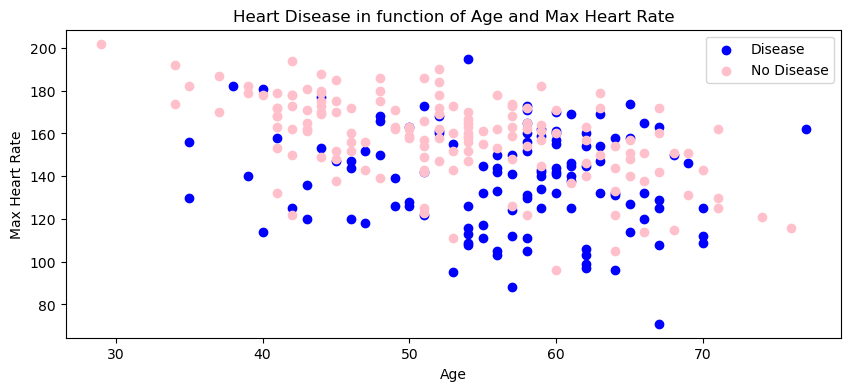

In [25]:
# Create another figure
plt.figure(figsize=(10,4))

# positve examples
plt.scatter(df.Age[df["Heart Disease"]==1], 
            df["Max HR"][df["Heart Disease"]==1], 
            c="blue") # define it as a scatter figure

# negative examples on the same plot
plt.scatter(df.Age[df["Heart Disease"]==0], 
            df["Max HR"][df["Heart Disease"]==0], 
            c="pink")

# Add some information
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

We can see that first older persons have more chance to have a heart disease and 
Also,
younger someone is, the higher their max heart rate (dots are higher on the left of the graph) and the older someone is, the more blue dots there are

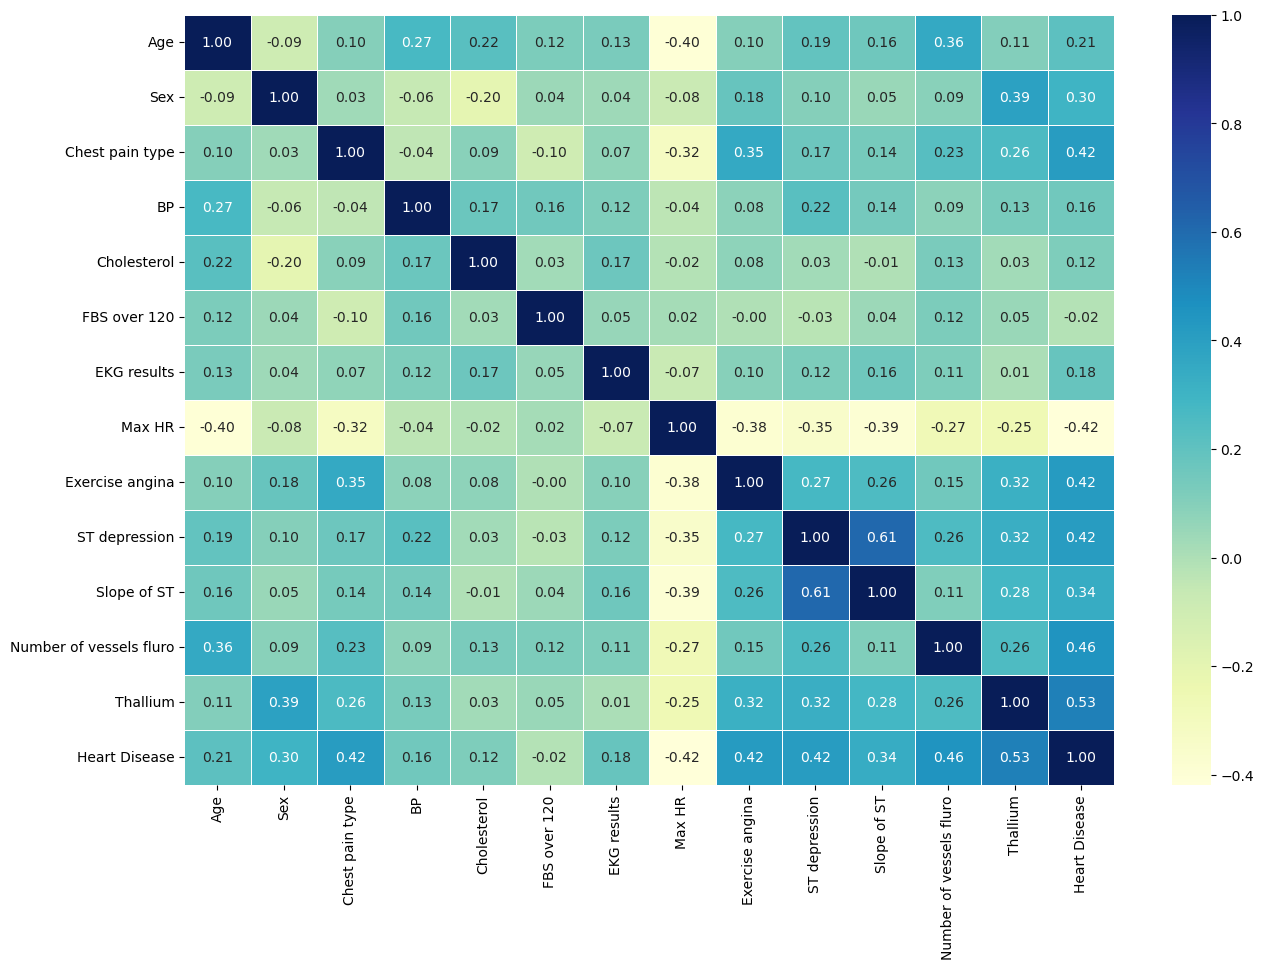

In [26]:
#let's find the correlation between our independent variables
#it may give an idea of which independent variables may or may not have an impact on our target variable.
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

A higher positive value means a potential positive correlation and a higher negative value means a potential negative correlation.

## 6. Modelling

In [27]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [28]:
# Everything except target variable
X = df.drop("Heart Disease", axis=1)

# Target variable
y = df["Heart Disease"].values

In [29]:
# Random seed for reproducibility
np.random.seed(30)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [30]:
len(X_train), len(y_train)

(216, 216)

In [31]:
len(X_test), len(y_test)

(54, 54)

I choose the following and I wille compare their results.

1. Logistic Regression - LogisticRegression()
2. K-Nearest Neighbors - KNeighboursClassifier()
3. RandomForest - RandomForestClassifier()

In [32]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}


In [33]:
# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(30)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [34]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\kwass\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6481481481481481,
 'Logistic Regression': 0.9074074074074074,
 'Random Forest': 0.8518518518518519}

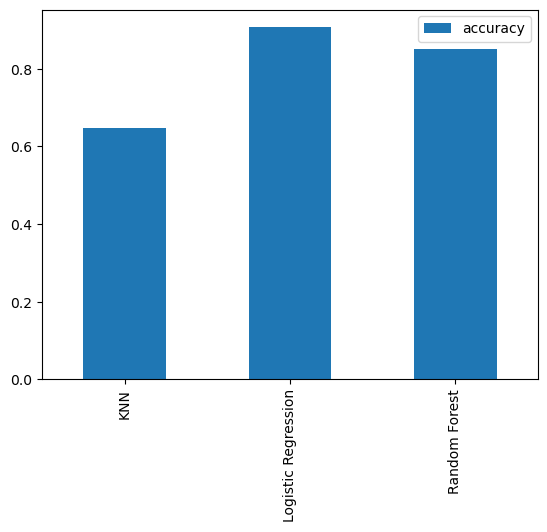

In [35]:
model_comparison = pd.DataFrame(model_scores, index=['accuracy'])
model_comparison.T.plot.bar();

We can say that the best algorithm for prediting heart disease is a LogisticRegression!

But let's tune the hyperparameters to see if we can reach better score

In [36]:
# Different LogisticRegression hyperparameters
grid = {"C": np.logspace(-4, 4, 50),
        "penalty" : ['none','l1', 'l2'],
        'max_iter' : [100, 1000,2500, 5000],
        "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


C:\Users\kwass\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1000 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kwass\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kwass\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\kwass\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 78, in _check_solver
    raise ValueError(

In [37]:
# Check the best parameters
log_reg.best_params_

{'C': 2.559547922699533,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [38]:
# Evaluate the model
log_reg.score(X_test, y_test)

0.8888888888888888

## 7. Experimentation

### Evaluating a classification model, beyond accuracy

We are going to evaluate the model by:

    *ROC curve and AUC score - plot_roc_curve()
    *Confusion matrix - confusion_matrix()
    *Cross validated metrics :
        - Accuracy
        - Precision
        - Recall 
        - F1-score

In [39]:
# Make preidctions on test data
y_preds = log_reg.predict(X_test)

y_preds

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

#### ROC Curve and AUC Scores

C:\Users\kwass\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


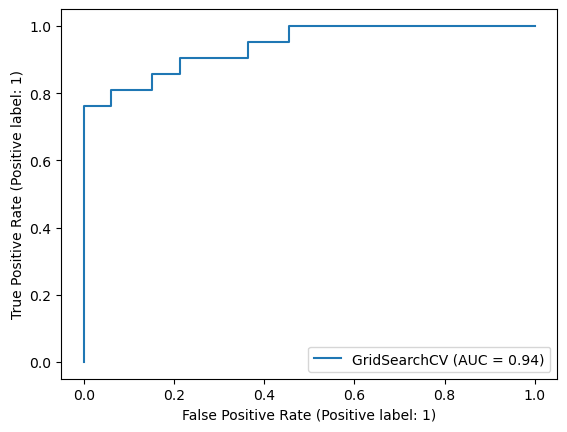

In [41]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(log_reg, X_test, y_test);

our model is good because the AUC is greater than 0.5

#### Confusion matrix

In [42]:
#Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[32  1]
 [ 5 16]]


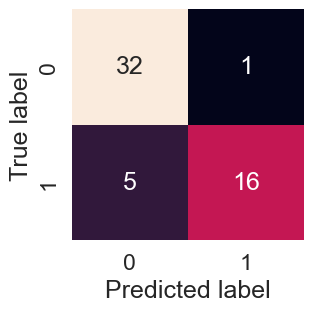

In [43]:
#to more visualize it
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test, y_preds)

there are 5 occasions where the model predicted 0 when it should've been 1 (false negative) and 1 occasions where the model predicted 1 instead of 0 (false positive)

#### Cross validated metrics

In [44]:
# Check best hyperparameters
log_reg.best_params_

{'C': 2.559547922699533,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [47]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
model = LogisticRegression(C= 2.559547922699533,
                           max_iter= 100,
                           penalty= 'l1',
                           solver= 'liblinear')

In [48]:
# Cross-validated accuracy score
cv_acc = cross_val_score(model,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc = np.mean(cv_acc)
cv_acc

0.8481481481481481

In [50]:
# Cross-validated precision score
cv_precision = cross_val_score(model,
                         X,
                         y,
                         cv=5, 
                         scoring="precision") # precision as scoring
cv_precision = np.mean(cv_precision)
cv_precision

0.8447974778844344

In [51]:
# Cross-validated recall score
cv_recall = cross_val_score(model,
                         X,
                         y,
                         cv=5, 
                         scoring="recall") # recall as scoring
cv_recall = np.mean(cv_recall)
cv_recall

0.8083333333333332

In [52]:
# Cross-validated F1 score
cv_f1 = cross_val_score(model,
                         X,
                         y,
                         cv=5, 
                         scoring="f1") # recall as scoring
cv_f1 = np.mean(cv_f1)
cv_f1

0.8253770758997401

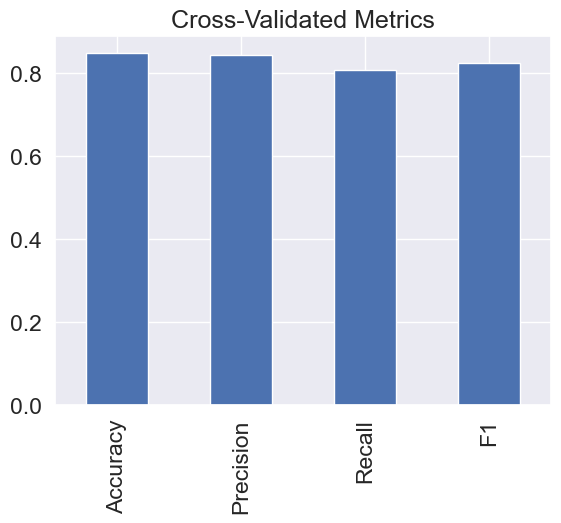

In [53]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

#### Feature importance

In [54]:
# Fit an instance of LogisticRegression (taken from above)
model.fit(X_train, y_train);

In [55]:
# Check coef_
model.coef_

array([[-0.02597932,  1.35027065,  0.48068777,  0.0172681 ,  0.00604258,
        -0.56967353,  0.35735311, -0.02901804,  0.65639099,  0.33682748,
         0.32378507,  0.92283536,  0.31807311]])

In [56]:
# Match coef to features
features_dict = dict(zip(df.columns, list(model.coef_[0])))
features_dict

{'Age': -0.025979319153803335,
 'Sex': 1.350270652172348,
 'Chest pain type': 0.48068777470810414,
 'BP': 0.01726809907046313,
 'Cholesterol': 0.006042583485458475,
 'FBS over 120': -0.5696735253446689,
 'EKG results': 0.3573531122025139,
 'Max HR': -0.02901804017001458,
 'Exercise angina': 0.6563909900545736,
 'ST depression': 0.33682748277530655,
 'Slope of ST': 0.32378506986876676,
 'Number of vessels fluro': 0.9228353614609387,
 'Thallium': 0.3180731114932472}

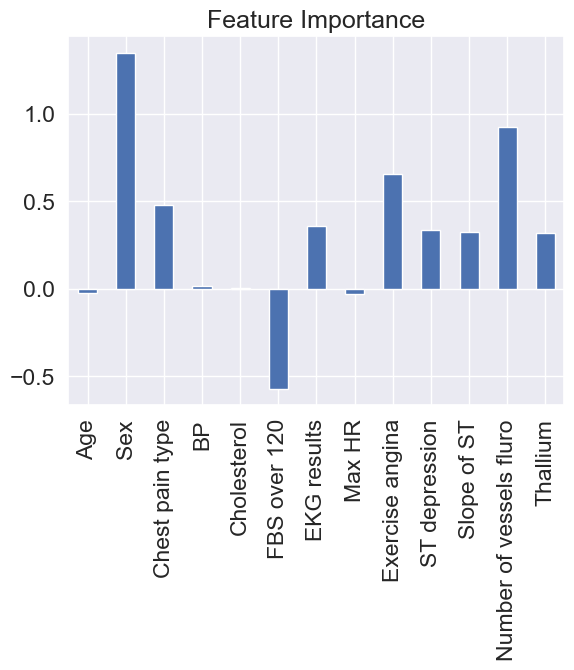

In [57]:
# Visualize feature importance
feature_importance_df = pd.DataFrame(features_dict, index=[0])
feature_importance_df.T.plot.bar(title="Feature Importance", legend=False);

In [59]:
# let's see the contrast of the slope of ST (a positive coefficient) with target
pd.crosstab(df["Slope of ST"], df["Heart Disease"])

Heart Disease,0,1
Slope of ST,,
1,98,32
2,44,78
3,8,10


This positive correlation means our model is picking up the pattern that as slope increases, so does the target value.

Is this true?

When you look at the contrast (pd.crosstab(df["slope"], df["target"]) it is. As slope goes up, so does target.

### Conclusion

In this case study, I didn't reach my objective. The highest accuracy of the model achieved was 88%.